<a href="https://colab.research.google.com/github/Th-Three/datascience_projects/blob/main/python%20project/Customer%20Analytics%3A%20Preparing%20Data%20for%20Modeling/%5BDatacamp_Project%5DProject_Customer_Analytics_Preparing_Data_for_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Analytics: Preparing Data for Modeling

Date: 17 October 2024

Written by: Thanaphop Threethipthikoon

Project source provided by: Datacamp


A common problem when creating models to generate business value from data is that the datasets can be so large that it can take days for the model to generate predictions. Ensuring that your dataset is stored as efficiently as possible is crucial for allowing these models to run on a more reasonable timescale without having to reduce the size of the dataset.

You've been hired by a major online data science training provider called *Training Data Ltd.* to clean up one of their largest customer datasets. This dataset will eventually be used to predict whether their students are looking for a new job or not, information that they will then use to direct them to prospective recruiters.

You've been given access to `customer_train.csv`, which is a subset of their entire customer dataset, so you can create a proof-of-concept of a much more efficient storage solution. The dataset contains anonymized student information, and whether they were looking for a new job or not during training:

| Column                   | Description                                                                      |
|------------------------- |--------------------------------------------------------------------------------- |
| `student_id`             | A unique ID for each student.                                                    |
| `city`                   | A code for the city the student lives in.                                        |
| `city_development_index` | A scaled development index for the city.                                         |
| `gender`                 | The student's gender.                                                            |
| `relevant_experience`    | An indicator of the student's work relevant experience.                          |
| `enrolled_university`    | The type of university course enrolled in (if any).                              |
| `education_level`        | The student's education level.                                                   |
| `major_discipline`       | The educational discipline of the student.                                       |
| `experience`             | The student's total work experience (in years).                                  |
| `company_size`           | The number of employees at the student's current employer.                       |
| `company_type`           | The type of company employing the student.                                       |
| `last_new_job`           | The number of years between the student's current and previous jobs.             |
| `training_hours`         | The number of hours of training completed.                                       |
| `job_change`             | An indicator of whether the student is looking for a new job (`1`) or not (`0`). |

#Problem statements

The Head Data Scientist at Training Data Ltd. has asked you to create a DataFrame called `ds_jobs_transformed` that stores the data in `customer_train.csv` much more efficiently. Specifically, they have set the following requirements:

- Columns containing categories with only two factors must be stored as Booleans (`bool`).
- Columns containing integers only must be stored as 32-bit integers (`int32`).
- Columns containing floats must be stored as 16-bit floats (`float16`).
- Columns containing nominal categorical data must be stored as the category data type.
- Columns containing ordinal categorical data must be stored as ordered categories, and not mapped to numerical values, with an order that reflects the natural order of the column.
- The DataFrame should be filtered to only contain students with 10 or more years of experience at companies with at least 1000 employees, as their recruiter base is suited to more experienced professionals at enterprise companies.

If you call `.info()` or `.memory_usage()` methods on `ds_jobs` and `ds_jobs_transformed` after you've preprocessed it, you should notice a substantial decrease in memory usage.

In [53]:
# Import necessary libraries
import pandas as pd

# Load the dataset
ds_jobs = pd.read_csv("customer_train.csv")

# View the dataset
ds_jobs.head()

,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevant experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [54]:
# Create a copy of ds_jobs for transforming
ds_jobs_transformed = ds_jobs.copy()

# Start coding here. Use as many cells as you like!
# Explore the datatypes of the DataFrame
ds_jobs_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_id              19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevant_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  job_change              19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

##Prepare the two factor column

In [55]:
#Find the columns with 2 unique values
ds_jobs_transformed.nunique()[ds_jobs_transformed.nunique() == 2].index

Index(['relevant_experience', 'job_change'], dtype='object')

In [56]:
#Find how many missing values in the columns 'relevant_experience' and 'job_change'. Calculate how many missing values compare to the total row in percent
print(ds_jobs_transformed['relevant_experience'].isna().sum())
print(ds_jobs_transformed['job_change'].isna().sum())
print(round(ds_jobs_transformed['relevant_experience'].isna().sum()/ds_jobs_transformed.shape[0]*100,2))
print(round(ds_jobs_transformed['job_change'].isna().sum()/ds_jobs_transformed.shape[0]*100,2))

0
0
0.0
0.0


In [57]:
#get the unique value from the columns 'relevant_experience' and 'job_change'
print(ds_jobs_transformed['relevant_experience'].unique())
print(ds_jobs_transformed['job_change'].unique())

['Has relevant experience' 'No relevant experience']
[1. 0.]


In [58]:
#Create the dictionary for mapping the above values to the boolean value
two_factor_cats = {
 "relevant_experience": {"Has relevant experience": True, "No relevant experience": False},
 "job_change": {1.0: True, 0.0: False}
}

##Prepare the numerical column (`int` and `float`)

In [59]:
#find the column with numeric datatype and print the column names
print(ds_jobs_transformed.select_dtypes(include=['int64']).columns)
print(ds_jobs_transformed.select_dtypes(include=['float64']).columns)

Index(['student_id', 'training_hours'], dtype='object')
Index(['city_development_index', 'job_change'], dtype='object')


We can just ignore the `'job_change'` column since it is the 2-factor column.
- The `int` column are `'student_id'` and `'training_hours'`
- The `float` column is `'city_development_index'`

##Prepare the categorical column

In [60]:
#Find the column that can be 'category' type from the 'object' type
list_of_objcol = ds_jobs_transformed.select_dtypes(include=['object']).columns
print(list_of_objcol)

#Find the datatype in each member of list_of_objcol
for col in list_of_objcol:
    print(ds_jobs_transformed[col].value_counts(), '\n')

Index(['city', 'gender', 'relevant_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')
city
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: count, Length: 123, dtype: int64 

gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64 

relevant_experience
Has relevant experience    13792
No relevant experience      5366
Name: count, dtype: int64 

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64 

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64 

major_discipline
STEM               14492
Humanities           669
Othe

From the above output, we can divided the catrgorical data into the following:
- Nominal :
  - city
  - gender
  - major_discipline
  - company_type
- Ordinal :
  - enrolled_university
  - education_level
  - experience
  - company_size
  - last_new_job

In [61]:
#Create the dictionary to define the ordinal categories for each column
ordinal_cats = {
    "enrolled_university": ["no_enrollment", "Full time course", "Part time course"],
    "education_level": ["Primary School", "High School", "Graduate", "Masters", "Phd"],
    "experience": ["<1"] + list(map(str, range(1, 21))) + [">20"],
    "company_size": ["<10", "10-49", "50-99", "100-499", "500-999", "1000-4999", "5000-9999", "10000+"],
    "last_new_job": ["never"] + list(map(str, range(1, 5))) + [">4"]
}

##Data transformation part

In [62]:
#After explore the unique value in potential 2 factors columns.
#Columns with 2 factors: relevant_experience, job_change
#Columns with int64: student_id, training_hours
#Columns with float64: city_development_index , job_change(need to change into 2-factor)
#Nominal(can't aggregate, cat dog pen) : city, gender,enrolled_university, major_discipline, company_type
#Ordinal(may able to aggregate, 1 to 5 likes etc) : education_level, experience?, company_size?,last_new_job

# create the for loop to transform each type of columns
for col in ds_jobs_transformed.columns:
  if col in two_factor_cats.keys():
      ds_jobs_transformed[col] = ds_jobs_transformed[col].map(two_factor_cats[col])
  elif col in ordinal_cats.keys():
      ds_jobs_transformed[col] = ds_jobs_transformed[col].astype("category").cat.reorder_categories(new_categories=ordinal_cats[col], ordered=True)
  elif col in ["student_id", "training_hours"]:
      ds_jobs_transformed[col] = ds_jobs_transformed[col].astype("int32")
  elif col == "city_development_index":
      ds_jobs_transformed[col] = ds_jobs_transformed[col].astype("float16")
  else: #other nominal categorical data
      ds_jobs_transformed[col] = ds_jobs_transformed[col].astype("category")

#filter the DataFrame to only contain students with 10 or more years of experience at companies with at least 1000 employees.
ds_jobs_transformed = ds_jobs_transformed[(ds_jobs_transformed["experience"] >= "10") & (ds_jobs_transformed["company_size"] >= "1000-4999")]

#The Final result of memory saving
See how the new dataframe ('ds_jobs_transformed') used memory less than the original dataframe ('ds_job').

The old dataframe used up memory: 11.82 MB
The new dataframe used up memory: 0.08 MB


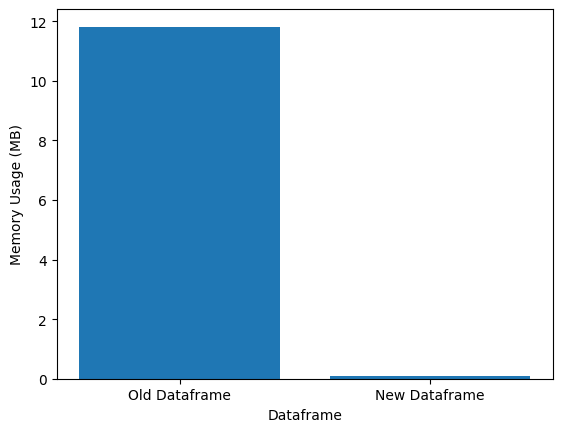

In [63]:
#See how the new dataframe ('ds_jobs_transformed') used memory less than the original dataframe ('ds_job'). in byte
old_memory= ds_jobs.memory_usage(deep=True).sum()
new_memory = ds_jobs_transformed.memory_usage(deep=True).sum()

#print to show the comparison and make the bar plot
print(f"The old dataframe used up memory: {round(old_memory/1024**2,2)} MB")
print(f"The new dataframe used up memory: {round(new_memory/1024**2,2)} MB")

#plot the bar chart of these two values
import matplotlib.pyplot as plt
plt.bar(["Old Dataframe", "New Dataframe"], [round(old_memory/1024**2,2), round(new_memory/1024**2,2)])
#set the label for y and x axis
plt.ylabel("Memory Usage (MB)")
plt.xlabel("Dataframe")
#show
plt.show()